<a href="https://colab.research.google.com/github/shreejitp/battle_of_the_neighborhoods/blob/main/Competitors_nearby_Geojson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I will be analyzing geolocation data of Grocery stores in the Greater Phoenix Area.  The main focus will be on taking a brand (for example-Walmart) and then for each of the brand's store, finding the distance of the nearest competitor stores. 

In [1]:
!pip install geojson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 32.3 MB/s 
     |████████████████████████████████| 6.3 MB 47.8 MB/s 
     |████████████████████████████████| 16.7 MB 47.3 MB/s 


In [3]:
!pip install shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install geojsonio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 152 kB 17.0 MB/s 
     |████████████████████████████████| 4.0 MB 40.5 MB/s 
  Created wheel for geojsonio: filename=geojsonio-0.0.3-py3-none-any.whl size=5041 sha256=591754a7a208ff9bcb6cbce58adb03aa62fbf0a7d2eba6338a3550ed232501da
  Stored in directory: /root/.cache/pip/wheels/21/ef/f0/71474034f127d681a5cde034ccd6ca0a8fdb117ff24623b855
Successfully built geojsonio


In [ ]:
#/content/drive/MyDrive/Data_Science/Datasets/phx_supermarket.geojson

#path to file on Google Drive 

In [7]:
# Data can also be downloaded from - https://github.com/shreejitp/battle_of_the_neighborhoods/blob/main/phx_supermarket.geojson
import geopandas as gpd
df=gpd.read_file('/content/drive/MyDrive/Data_Science/Datasets/phx_supermarket.geojson')

In [8]:
df.head(4)

,id,@id,addr:city,addr:country,addr:county,addr:full,addr:housenumber,addr:postcode,addr:state,addr:street,...,short_name,source,source:name,start_date,store_number,toilets:wheelchair,twitter,website,wheelchair,geometry
0,way/32973452,way/32973452,Phoenix,US,None,None,850,85020,AZ,East Hatcher Road,...,None,esri/USA_NAD_Addresses,None,None,None,None,None,None,None,"POLYGON ((-112.06160 33.57300, -112.06160 33.5..."
1,way/33881655,way/33881655,Phoenix,US,None,None,115,85020,AZ,East Dunlap Avenue,...,None,esri/USA_NAD_Addresses,None,None,None,None,None,https://www.walmart.com/store/2632/phoenix-az/...,None,"POLYGON ((-112.07258 33.56674, -112.07258 33.5..."
2,way/44660034,way/44660034,Mesa,US,None,857 N Dobson Rd,857,85201,AZ,North Dobson Road,...,None,None,None,None,None,None,None,https://www.walmart.com/store/2482/mesa-az/wha...,yes,"POLYGON ((-111.86651 33.43184, -111.86574 33.4..."
3,way/65592189,way/65592189,Phoenix,US,None,None,4726,85028,AZ,East Shea Boulevard,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-111.97891 33.58314, -111.97891 33.5..."


In [9]:
df.count()

id                    392
@id                   392
addr:city             273
addr:country           91
addr:county             4
                     ... 
toilets:wheelchair      6
twitter                 1
website                98
wheelchair             19
geometry              392
Length: 82, dtype: int64

In [10]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
df.columns

Index(['id', '@id', 'addr:city', 'addr:country', 'addr:county', 'addr:full',
       'addr:housenumber', 'addr:postcode', 'addr:state', 'addr:street',
       'addr:unit', 'air_conditioning', 'alt_name:ko', 'area', 'branch',
       'brand', 'brand:wikidata', 'brand:wikipedia', 'building',
       'building:levels', 'bulk', 'check_date', 'check_date:opening_hours',
       'construction', 'contact:phone', 'contact:website', 'cuisine',
       'delivery', 'description', 'designation', 'drink:beer', 'drink:wine',
       'drive_through', 'facebook', 'fair_trade', 'gnis:feature_id',
       'internet_access', 'layer', 'membership', 'name', 'name:en', 'name:ko',
       'name:zh-Hans', 'name:zh-Hant', 'old_name', 'opening_hours',
       'opening_hours:covid19', 'operator', 'operator:wikidata',
       'operator:wikipedia', 'organic', 'payment:american_express',
       'payment:apple_pay', 'payment:cash', 'payment:cheque', 'payment:coins',
       'payment:contactless', 'payment:credit_cards', 'paymen

In [12]:
df1=df.groupby('brand')['id'].count().reset_index(name='counts')

In [13]:
df1.sort_values('counts',ascending=False)

,brand,counts
18,Walmart,63
6,Fry's Food and Drug,61
13,Safeway,48
15,Sprouts Farmers Market,29
3,Bashas',24
5,Food City,18
7,Fry's Marketplace,18
2,Albertsons,17
17,Trader Joe's,12
20,WinCo Foods,7


Looks like, Walmart, Fry's and Safeway are leading the market.

In [14]:
# Another way to write 
#df.groupby('brand')['id'].count().reset_index(name='counts').sort_values('counts',ascending=False)

In [15]:
# Checking the type of Geometry
df.geometry

0      POLYGON ((-112.06160 33.57300, -112.06160 33.5...
1      POLYGON ((-112.07258 33.56674, -112.07258 33.5...
2      POLYGON ((-111.86651 33.43184, -111.86574 33.4...
3      POLYGON ((-111.97891 33.58314, -111.97891 33.5...
4      POLYGON ((-112.06250 33.53985, -112.06261 33.5...
                             ...                        
387                          POINT (-112.13264 33.51046)
388                          POINT (-111.70235 33.30471)
389                          POINT (-111.68751 33.23297)
390                          POINT (-111.87265 33.41329)
391                          POINT (-111.96116 33.35103)
Name: geometry, Length: 392, dtype: geometry

In [16]:
# Accessing the geometry
# Some are polygon while others are just points 
type(df['geometry'][210])

shapely.geometry.polygon.Polygon

In [17]:
# List of all Walmart Stores 
#df[df['brand']=='Walmart']

In [18]:
# Count of Walmart Stores by Zip Code
#df[df['brand']=='Walmart'].groupby('addr:postcode').count()['id'].reset_index(name='counts').sort_values('counts',ascending=False)

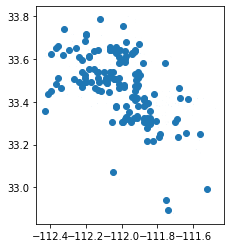

In [19]:
# Using matplotlib to plot the geometry on a 2d surface  
import matplotlib.pyplot as plt
%matplotlib inline
df['geometry'].plot()
plt.rcParams['figure.figsize'] = (20, 10)

In [20]:
# Extracting a subset of columns that are of interest 
cv=df[['brand','addr:housenumber','addr:street'
        ,'addr:city','addr:postcode','geometry']]

In [21]:
cv

,brand,addr:housenumber,addr:street,addr:city,addr:postcode,geometry
0,Fry's Food and Drug,850,East Hatcher Road,Phoenix,85020,"POLYGON ((-112.06160 33.57300, -112.06160 33.5..."
1,Walmart,115,East Dunlap Avenue,Phoenix,85020,"POLYGON ((-112.07258 33.56674, -112.07258 33.5..."
2,Walmart,857,North Dobson Road,Mesa,85201,"POLYGON ((-111.86651 33.43184, -111.86574 33.4..."
3,Trader Joe's,4726,East Shea Boulevard,Phoenix,85028,"POLYGON ((-111.97891 33.58314, -111.97891 33.5..."
4,Safeway,810,East Glendale Avenue,None,85020,"POLYGON ((-112.06250 33.53985, -112.06261 33.5..."
...,...,...,...,...,...,...
387,None,3446,West Camelback Road,Phoenix,85017,POINT (-112.13264 33.51046)
388,Fry's Marketplace,4075,East Williams Field Road,Gilbert,85295,POINT (-111.70235 33.30471)
389,Bashas',23760,South Power Road,Queen Creek,85142,POINT (-111.68751 33.23297)
390,H Mart,None,None,Mesa,None,POINT (-111.87265 33.41329)


In [22]:
from geopandas import GeoSeries

In [23]:
# Creating a point field from geometry; Converting polygons to point 
cv['point']=cv['geometry'].centroid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [24]:
print(cv['point'][0])

POINT (-112.0610216384509 33.572651577176075)


There many packages available for visualizing Geolocation data. Folium is one I like in particular. 

In [26]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
# Creating a Base Map with Folium 
# Provide Latitude (Lat) and Longitude (Long) of a location for the base map, I chose a Lat Long from the Phoenix Area 

import folium
m=folium.Map(location=[33.572651577176075,-112.0610216384509],zoom_start=11,min_zoom=8,max_zoom=14)
m

In [28]:
#Adding markers to the map
folium.Marker(location=[33.51046,-112.13264]).add_to(m)
m

In [29]:
#Pulling Lats and Longs from Point 
# https://stackoverflow.com/questions/49635436/shapely-point-geometry-in-geopandas-df-to-lat-lon-columns
cv['lon'] = cv.point.x
cv['lat'] = cv.point.y

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Now that we have this location data, I am interested in seeing for each walmart store,  how far is the nearest Frys, Safeway and another walmart store. This would give us a sense of what the competition looks like for a particular store. 


In [30]:
walmart=cv[cv['brand']=='Walmart']
frys=cv[cv['brand']=="Fry's Food and Drug"]
safeway=cv[cv['brand']=='Safeway']

In [34]:
from shapely.ops import nearest_points

# Function to compute the nearest neighbor 
def calculate_nearest(row, destination, val, col='point'):
    # 1 - create unary union    
    dest_unary = destination['point'].unary_union
    # 2 - find closest point
    nearest_geom = nearest_points(row[col], dest_unary)
    # 3 - Find the corresponding geom
    match_geom = destination.loc[destination.point == nearest_geom[1]]
    # 4 - get the corresponding value
    match_value = match_geom[val].to_numpy()[0]
    return match_value

In [35]:
# Creating a new function to compute distance of walmart to nearest walmart 
from shapely.ops import nearest_points
def calculate_sec_nearest(row, destination, val, col='point'):
    # 1 - create unary union    
    dest_unary = destination['point'].unary_union # Collects all the points in the destination ? 
    dest_unary = dest_unary - row[col] # Removing the current point from the distance computation 
    # 2 - find closest point
    nearest_geom = nearest_points(row[col], dest_unary)
    # 3 - Find the corresponding geom
    match_geom = destination.loc[destination.point == nearest_geom[1]]   ## Entering 2 for second nearest 
    # 4 - get the corresponding value
    match_value = match_geom[val].to_numpy()[0]
    return match_value

In [36]:
c=walmart['point'].unary_union
print(c)# Returns a collection of points 
print(walmart['point'][1])
print(c-walmart['point'][1])

MULTIPOINT (-112.42069948835825 33.61246540098276, -112.39531866533156 33.45950622310652, -112.392434 33.622677, -112.36435991365299 33.4872081589769, -112.35810358275508 33.642841363271785, -112.33810665801167 33.45908475712524, -112.33647267780795 33.610589404235846, -112.27616955023275 33.68035285897448, -112.26733435197711 33.51018779546414, -112.23418447593542 33.65074914270418, -112.23031164429293 33.57849315903142, -112.22320550514902 33.420384744898186, -112.2231777 33.4705533, -112.218867 33.5391322, -112.21831425025574 33.60913602607177, -112.20185050939821 33.58021990806045, -112.201314 33.713791, -112.18478588239061 33.636450795372824, -112.1799153 33.5514047, -112.17273009052137 33.49680291355, -112.16999216693435 33.56477798739062, -112.15035936695953 33.65606161391526, -112.13689757267493 33.39054043309551, -112.13258961592213 33.52678804394459, -112.12165867724279 33.57293991430173, -112.11295960125646 33.70834823670563, -112.09810231625006 33.637227447489785, -112.0927

In [37]:
walmart['nearest_geom_frys'] = cv.apply(calculate_nearest, destination=frys, val='point', axis=1)
walmart['nearest_geom_safeway'] = cv.apply(calculate_nearest, destination=safeway, val='point', axis=1)
walmart['nearest_geom_nwalmart'] = cv.apply(calculate_sec_nearest, destination=walmart, val='point', axis=1) # It is getting the nearest walmart as itself 

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/usr/local/lib/python3.7/dist-packages/geopandas/geodat

In [ ]:
# walmart.head(2)
# nearest_geom is not of geometry type 


In [ ]:
# from shapely.geometry import Point
# import geopandas as gpd
# pnt1 = Point(80.99456, 7.86795)
# pnt2 = Point(80.97454, 7.872174)
# points_df = gpd.GeoDataFrame({'geometry': [pnt1, pnt2]}, crs='EPSG:4326')
# #points_df = points_df.to_crs('EPSG:5234')
# #points_df2 = points_df.shift() #We shift the dataframe by 1 to align pnt1 with pnt2
# #points_df.distance(points_df2)

In [ ]:
# print(type(walmart['nearest_geom_frys']))
# print(type(walmart['point']))

In [ ]:
# type(walmart)

In [ ]:
# wm1=walmart['point']

In [ ]:
# wm2=walmart['nearest_geom_frys']

In [39]:
# print(type(wm1)) # Series of all walmart points -- GeoPandas Geoseries  
# print(type(wm2)) # Series of all frys   -- Pandas Series 
# print(wm1[1]) # Series of all walmart points 


In [ ]:

#gdf = GeoDataFrame(wm2, geometry='nearest_geom_frys')

In [40]:
#type(gdf['nearest_geom_frys'])

In [41]:
# gdf

In [43]:
# print(gdf.crs) # CRS stands for cordinate reference System 
# print(wm1.crs)

In [44]:
# To calculate the distance, Set the CRS to 3857 
# Refer- https://stackoverflow.com/questions/72073417/userwarning-geometry-is-in-a-geographic-crs-results-from-buffer-are-likely-i
# gdf=gdf.to_crs(crs=3857)
# wm1=wm1.to_crs(crs=3857)
# print(gdf.crs) # CRS stands for cordinate reference System 
# print(wm1.crs)

In [ ]:
#dist_f=wm1.distance(gdf)

In [ ]:
#walmart

In [45]:
import pandas as pd 
from geopandas import GeoDataFrame
from shapely.geometry import Point

#Collecting points of Interest in different Geoseries 
wm1=walmart['point']
wm2=walmart['nearest_geom_frys']
wm3=walmart['nearest_geom_safeway']
wm4=walmart['nearest_geom_nwalmart']

# Converting Pandas to Geo Dataframe 
gdf = GeoDataFrame(wm2, crs="epsg:4326", geometry='nearest_geom_frys')
gdf_s = GeoDataFrame(wm3, crs="epsg:4326", geometry='nearest_geom_safeway')
gdf_w = GeoDataFrame(wm4, crs="epsg:4326", geometry='nearest_geom_nwalmart')

wm1=wm1.to_crs(crs=3857)
gdf=gdf.to_crs(crs=3857)
gdf_s=gdf_s.to_crs(crs=3857)
gdf_w=gdf_w.to_crs(crs=3857)

dist_f=wm1.distance(gdf)
dist_s=wm1.distance(gdf_s)
dist_w=wm1.distance(gdf_w)

walmart['nearest_frys_dist_metres']=pd.Series(dist_f)
walmart['nearest_safeway_dist_metres']=pd.Series(dist_s)
walmart['nearest_walmart_dist_metres']=pd.Series(dist_w)

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


To walmart df, three new columns have been appended. The last 3 columns give the distance of a walmart store (in metres) to the nearest Fry's, Safeway and another Walmart store. 

In [46]:
walmart

,brand,addr:housenumber,addr:street,addr:city,addr:postcode,geometry,point,lon,lat,nearest_geom_frys,nearest_geom_safeway,nearest_geom_nwalmart,nearest_frys_dist_metres,nearest_safeway_dist_metres,nearest_walmart_dist_metres
1,Walmart,115,East Dunlap Avenue,Phoenix,85020,"POLYGON ((-112.07258 33.56674, -112.07258 33.5...",POINT (-112.07221 33.56650),-112.072209,33.566497,POINT (-112.0610216384509 33.572651577176075),POINT (-112.06233798292251 33.53947979316952),POINT (-112.09270438913282 33.52192859534842),1492.355607,3772.427220,6374.925546
2,Walmart,857,North Dobson Road,Mesa,85201,"POLYGON ((-111.86651 33.43184, -111.86574 33.4...",POINT (-111.86533 33.43198),-111.865329,33.431982,POINT (-111.8581418659528 33.41308162763496),POINT (-111.8730976 33.4165334),POINT (-111.81463863983583 33.45244129239172),2644.797248,2234.648879,6268.257699
5,Walmart,4747,East Cactus Road,Phoenix,85032,"POLYGON ((-111.97797 33.59578, -111.97799 33.5...",POINT (-111.97863 33.59612),-111.978631,33.596117,POINT (-111.94461 33.6246404),POINT (-111.97899016287353 33.62443502223194),POINT (-111.981796 33.6384509),5373.943194,3785.412029,5670.056052
9,Walmart,15355,North Northsight Boulevard,Scottsdale,85260,"POLYGON ((-111.89403 33.62541, -111.89408 33.6...",POINT (-111.89345 33.62464),-111.893447,33.624645,POINT (-111.88963573088313 33.58079575358047),POINT (-111.8751760657124 33.619373791578305),POINT (-111.981796 33.6384509),5875.944242,2152.516709,10006.685807
12,Walmart,12900,West Thunderbird Road,El Mirage,85335,"POLYGON ((-112.33744 33.61103, -112.33734 33.6...",POINT (-112.33647 33.61059),-112.336473,33.610589,POINT (-112.28882797353033 33.600654651098374),POINT (-112.35752579996854 33.6106027612195),POINT (-112.35810358275508 33.642841363271785),5467.480437,2343.623519,4938.597769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,Walmart,15431,West Greenway Road,Surprise,85374,POINT (-112.39243 33.62268),POINT (-112.39243 33.62268),-112.392434,33.622677,POINT (-112.39535960033093 33.64039910603474),POINT (-112.42530180536848 33.63734260947519),POINT (-112.42069948835825 33.61246540098276),2391.694539,4151.083496,3429.844134
332,Walmart,2020,North 75th Avenue,Phoenix,85035,POINT (-112.22318 33.47055),POINT (-112.22318 33.47055),-112.223178,33.470553,POINT (-112.2391771 33.4928144),POINT (-112.23581741651597 33.507618099223514),POINT (-112.22320550514902 33.420384744898186),3464.050056,5143.532776,6693.033323
374,Walmart,5290,South Power Road,Gilbert,85295,POINT (-111.68961 33.31959),POINT (-111.68961 33.31959),-111.689608,33.319595,POINT (-111.71962804532373 33.29042770520221),POINT (-111.68397661846188 33.26485469566475),POINT (-111.74111873183394 33.30504478212567),5124.491520,7316.978003,6052.844562
382,Walmart,1900,East Chandler Boulevard,Chandler,85225,POINT (-111.80847 33.30786),POINT (-111.80847 33.30786),-111.808471,33.307858,POINT (-111.78795395316294 33.30487121246158),POINT (-111.82222116486047 33.32215225184862),POINT (-111.79344440872433 33.2815020038798),2318.328247,2443.091317,3888.299535


In [49]:
df_o = pd.DataFrame(walmart)

In [54]:
# Computing the median distance in miles 
print(df_o['nearest_frys_dist_metres'].median()/1600)
print(df_o['nearest_safeway_dist_metres'].median()/1600)
print(df_o['nearest_walmart_dist_metres'].median()/1600)

2.1438730577206293
2.5944271852516234
3.5437850326715745


Interestingly, 50% of the walmart stores have a Fry's store unders 2.14 miles 

In [ ]:
#df_o.to_csv('/content/drive/MyDrive/Data_Science/Datasets/outp.csv')

Plotting all walmarts, frys on folium 


In [56]:
locations=walmart[['lat','lon']]
locationlist = locations.values.tolist()
#len(locationlist)

In [57]:
locationlist[1]

[33.431982207103545, -111.86532912706024]

In [58]:
locationlist

[[33.566496808411266, -112.07220904258915],
 [33.431982207103545, -111.86532912706024],
 [33.5961165451383, -111.97863102668083],
 [33.62464495124327, -111.89344694991858],
 [33.610589404235846, -112.33647267780795],
 [33.637227447489785, -112.09810231625006],
 [33.49680291355, -112.17273009052137],
 [33.30504478212567, -111.74111873183394],
 [33.47872718413489, -112.00101960582462],
 [33.68035285897448, -112.27616955023275],
 [33.52678804394459, -112.13258961592213],
 [33.420384744898186, -112.22320550514902],
 [33.45908475712524, -112.33810665801167],
 [33.413857000264144, -111.57532119876282],
 [33.4872081589769, -112.36435991365299],
 [33.507837471898604, -111.88930169832727],
 [33.039114967993605, -112.01423245869627],
 [33.38502936614791, -111.60003643614424],
 [33.393911377396115, -111.92787771762488],
 [33.39054043309551, -112.13689757267493],
 [33.00004720377987, -111.52021246895082],
 [33.45950622310652, -112.39531866533156],
 [33.57849315903142, -112.23031164429293],
 [33.17

In [60]:
# All Walmart stores
map = folium.Map(location=[33.431982207103545, -111.86532912706024], zoom_start=10)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point],popup='Walmart',icon=folium.Icon(color="blue")).add_to(map)
    #folium.Marker(locationlist[point], popup=df_counters['Name'][point]).add_to(map)
map

In [ ]:
#frys

In [61]:
# Walmart and Fry's

locations_f=frys[['lat','lon']]
locationlist_f = locations_f.values.tolist()
map2 = folium.Map(location=[33.431982207103545, -111.86532912706024], zoom_start=10)
for point in range(0, len(locationlist_f)):
    folium.Marker(locationlist_f[point],popup='Frys',icon=folium.Icon(color="red")).add_to(map2)
    folium.Marker(locationlist[point],popup='Walmart',icon=folium.Icon(color="blue")).add_to(map2)
    #folium.Marker(locationlist[point], popup=df_counters['Name'][point]).add_to(map)
map2
#len(locationlist)


In [74]:
# Walmart and Fry's and Safeway

locations_s=safeway[['lat','lon']]
locationlist_s = locations_s.values.tolist()
map3 = folium.Map(location=[33.431982207103545, -111.86532912706024], zoom_start=10)
for point in range(0, len(locationlist_s)):
    folium.Marker(locationlist_f[point],popup='Frys',icon=folium.Icon(color="red")).add_to(map3)
    folium.Marker(locationlist[point],popup='Walmart',icon=folium.Icon(color="blue")).add_to(map3)
    folium.Marker(locationlist_s[point],popup='Safeway',icon=folium.Icon(color="pink")).add_to(map3)
    #folium.Marker(locationlist[point], popup=df_counters['Name'][point]).add_to(map)
map3
# #len(locationlist)
